<a href="https://colab.research.google.com/github/aniket-deshmukh-data/Capstone-Project-Play-Store-App-Review-Analysis-Aniket-Deshmukh/blob/main/Play_Store_App_Review_Analysis_Team_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction**
---

Google Play Store or formerly Android Market, is a digital distribution service developed and operated by Google. It is an official apps store that provides variety content such as apps, books, magazines, music, movies and television programs. It serves an as platform to allow users with 'Google certified' Android operating system devices to donwload applications developed and published on the platform either with a paid or free of cost. With the rapidly growth of Android devices and apps, it would be interesting to perform data analysis on the data to obtain valuable insights.

# **Exploratory Data Analysis**
---
Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

# **Content in play store data**
---
## **First Dataset : Play Store Data**

1. App : The name of the app
2. Category : The category of the app
3. Rating : The rating of the app in the Play Store
4. Reviews : The number of reviews of the app
5. Size : The size of the app
6. Install : The number of installs of the app
7. Type : The  price type of the app
8. Price : The price of the app
9. Content Rating : The Rating given by user
10. Genres: The genre of the app
11. Last Updated : The date when the app given last update
12. Current Ver : The current version of the app
13. Android Ver : The minimum Android version required to run the app



## **Second Dataset: User Reviews**

1. App : The name of the application
2. Translated_Review : comment given by user
3. Sentiment : view or opinion of the user 
4. Sentiment_Polarity : Strongness of Sentiment polarity
5. Sentiment_Subjectivity : It is a public opinion and not a factual information.

#  **Explore and Analyze the data**
---

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [ ]:
# read all data and save in respective dataframe.
file_path=('/content/drive/MyDrive/play store data')
df=pd.read_csv(file_path+'/Play Store Data.csv')
df_reviews=pd.read_csv(file_path+ '/User Reviews.csv')

## **First Dataset information**

In [ ]:
#check column index
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# change column name for better use vatiable name
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8.432000e+03,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,2.054609e+06,7.777507e+06,1.099299
std,0.536625,1.831320e+06,2.171068e+06,5.375828e+07,16.852152
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.900000e+05,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,1.200000e+06,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,2.800000e+06,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+07,1.000000e+09,400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **Second Dataset information**

In [ ]:
#check column index
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df_reviews.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
23702,Candy Crush Soda Saga,I stuck level 1670 almost 3 months. I played t...,Negative,-0.270313,0.631250
4590,Agar.io,Add ai mode play easier play bots easy challen...,Positive,0.067593,0.614815
37975,EMT Tutor NREMT-B Study Guide,NaN,NaN,NaN,NaN
31898,DEAD TARGET: FPS Zombie Apocalypse Survival Games,NaN,NaN,NaN,NaN
10690,BEST CAR SOUNDS,Dam AWESOME DUDES,Positive,1.000000,1.000000


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# **Data Cleaning**
---

## **Null value calculate from first dataset**

Analyse each column from first dataset and perform data cleaning

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# unique value
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#some values not belongs to category column remove that values.
df=df.drop(index=10472)
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
# drop nan value from some column
df=df.dropna(subset=['Rating','Type','Price','Size','Current_Ver','Android_Ver'],how='all')

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
#change datatype from object to int 
df['Reviews'] = df['Reviews'].astype(int)

In [ ]:
#Remove 'text' from numeric value in size column
def convert_dtype(value):
  if value[-1:] == 'k':
    return float(value[:-1])*1000
  elif value[-1:] == 'M':
    return float(value[:-1])*100000
  else:
    return np.nan
df['Size'] = df['Size'].map(lambda x: convert_dtype(x))

In [ ]:
df['Size'].unique()
df['Size'].astype(float)

0        1900000.0
1        1400000.0
2         870000.0
3        2500000.0
4         280000.0
           ...    
10836    5300000.0
10837     360000.0
10838     950000.0
10839          NaN
10840    1900000.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
# remove unwanted symbols from install column and convert datatype as float
df["Installs"]=df["Installs"].apply(lambda x : x.replace("+",""))
df["Installs"]=df["Installs"].apply(lambda x : x.replace(",","")).astype(float)

In [ ]:
# remove '$' symbols from price column and convert datatype as float
df["Price"]=df["Price"].apply(lambda x : x.replace("$","")).astype(float)
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df["Price"].dtype

dtype('float64')

## **Null value calculate from second dataset**

In [ ]:
updated_df_reviews=df_reviews.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity'],how='all')
updated_df_reviews.shape

(37432, 5)

## **Handling Duplicate value**

Remove if there is any duplicate value from both column

In [ ]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [ ]:
df[df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.5,4447388,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,6700000.0,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
df.drop_duplicates(subset= 'App', inplace = True)
df.shape

(9659, 13)

All Data cleaning is completed.
Now use all this data to find some insights of given data.

# **Find Insights from given Dataset.**
---

## **1. Find Category which have highest mean price apps and Category which have maximum  Ratings?**

In [ ]:
# merge category vs price and rating column
merging_df=df.groupby('Category')
Mean_rating=merging_df.Rating.mean()
Mean_price=merging_df.Price.mean()

In [ ]:
#Find mean rating
print(Mean_rating)
#Find mean price
print(Mean_price)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

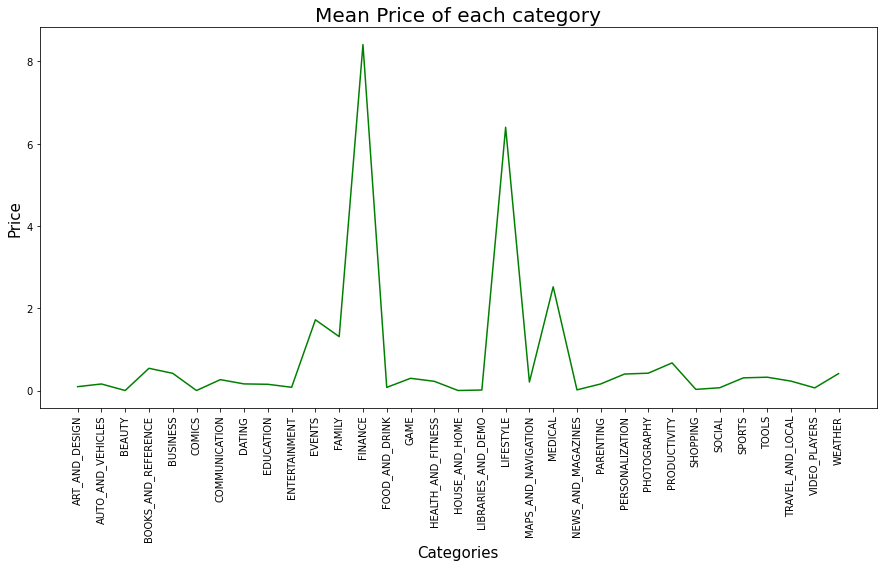

In [ ]:
# Draw category and mean price graph
fig = plt.figure(figsize=(15,7))
plt.plot(Mean_price,color='g')
plt.xticks(rotation=90)
plt.title('Mean Price of each category',fontsize = 20)
plt.xlabel('Categories',fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.show()

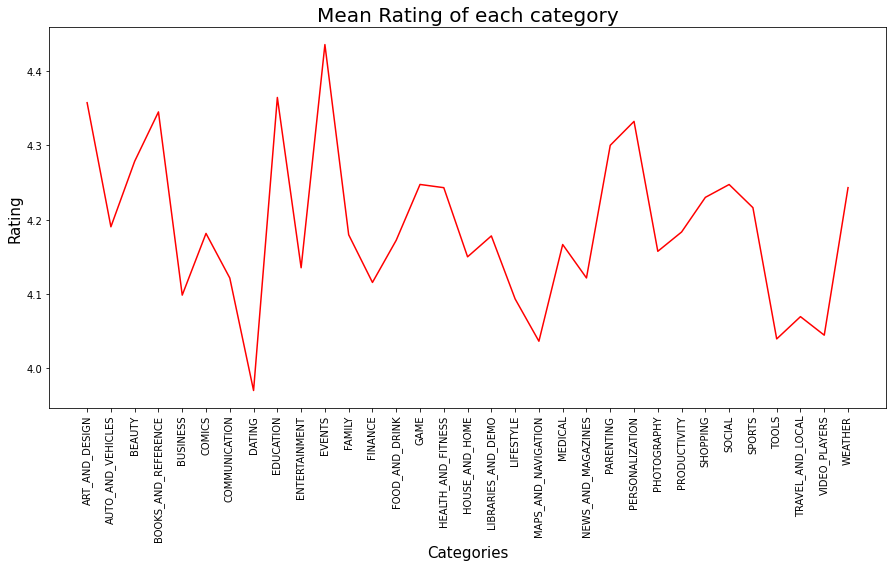

In [ ]:
# Draw category and mean Rating graph
fig = plt.figure(figsize=(15,7))
plt.plot(Mean_rating, color='r')
plt.xticks(rotation=90)
plt.title('Mean Rating of each category',fontsize = 20)
plt.xlabel('Categories',fontsize = 15)
plt.ylabel('Rating',fontsize = 15)
plt.show()

### **Insights**

*  Highest Mean price is for FINANCE  category and after that LIFESTYLE category.
*   Highest Rating is for EVENTS category and Lowest rating for DATING category.



## **2. Analyse permission of app for specific age group**

In [ ]:
#analyse some content rating column.
df['Content_Rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content_Rating, Length: 9659, dtype: object>

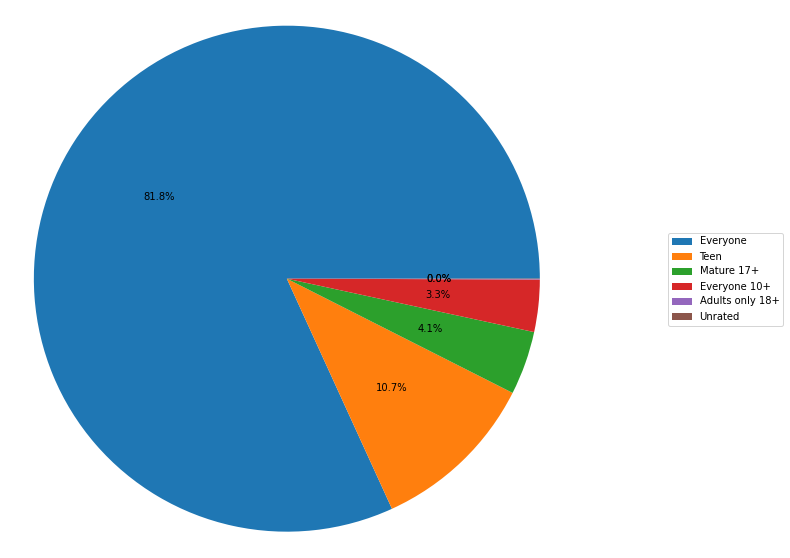

In [ ]:
fig, rating_ = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
content_rating_count = df["Content_Rating"].value_counts()
labels = content_rating_count.index
sizes = content_rating_count.values
rating_.pie(sizes,labeldistance=3,autopct='%2.1f%%')
rating_.legend(labels=labels,loc="right", bbox_to_anchor=(0.9, 0, 0.5, 1))
rating_.axis("equal")
plt.show()

### **Insights**

*  81.8% app can use every age group person.
*  Adults only 18+ and unrated have very less number of apps.

## **3. Find Which category have maximum number of install apps?**

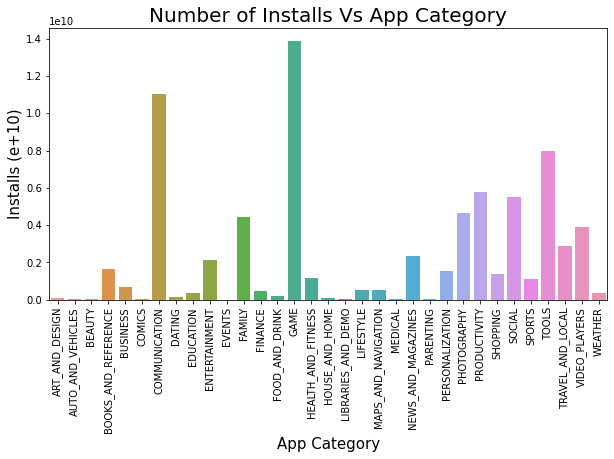

In [ ]:
#merge category vs installs data
df_category = df.groupby('Category')[['Installs']].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=df_category)
plt.xticks(rotation=90)
plt.xlabel('App Category',fontsize =15)
plt.ylabel('Installs (e+10)',fontsize =15)
plt.title('Number of Installs Vs App Category',fontsize =20)
plt.show()

### **Insights**

Gaming have maximum number of installed app.

## **4. Is size affect on type of app?**

In [ ]:
def price_type(cost):
  if cost== 0.:
    return "Free"
  else :
    return "Paid"

In [ ]:
final_df=df['Price'].apply(price_type)
final_df.value_counts()

Free    8903
Paid     756
Name: Price, dtype: int64

In [ ]:
df.groupby(final_df)['Size'].mean()

Price
Free    2.064927e+06
Paid    1.937912e+06
Name: Size, dtype: float64

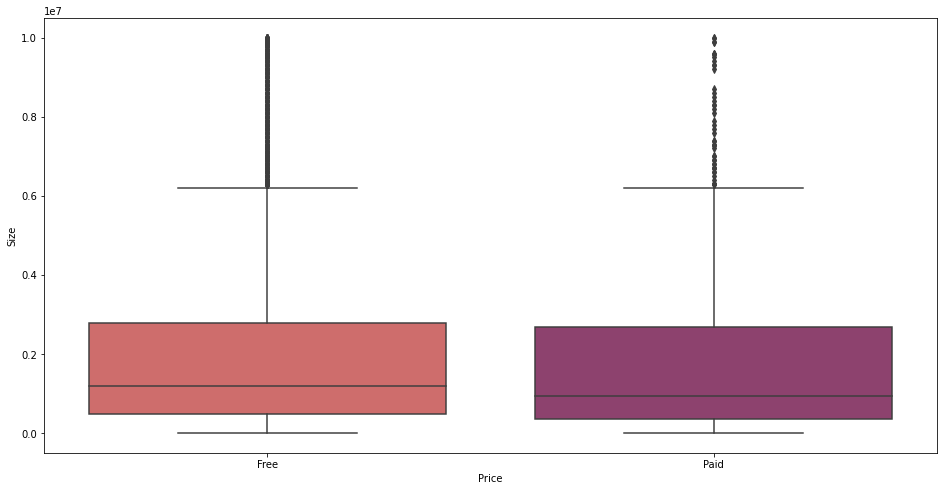

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x=final_df,y='Size',data = df,palette = 'flare')

### **Insights**

Size of app factor dont affect on free or paid type apps.

## **5. Check if there is any co-relation in both the dataframes.**

In [ ]:
# First data set corelation
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055081,0.061928,0.040143,-0.021199
Reviews,0.055081,1.000000,0.179429,0.625165,-0.007598
Size,0.061928,0.179429,1.000000,0.134076,-0.021729
Installs,0.040143,0.625165,0.134076,1.000000,-0.009405
Price,-0.021199,-0.007598,-0.021729,-0.009405,1.000000


In [ ]:
# second data set corelation
updated_df_reviews.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


In [ ]:
# combine both data set and find corelation
df_copy=df.copy()
df_user_copy=updated_df_reviews.copy()
merge_df_copy=pd.merge(df_copy,df_user_copy,how='inner', left_on='App', right_on='App')
merge_df_copy.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.166165,0.020147,-0.010055,0.092889,0.068716
Reviews,0.075736,1.000000,0.430394,0.564259,-0.020589,-0.080007,-0.009265
Size,0.166165,0.430394,1.000000,0.213775,-0.019975,-0.159722,0.009672
Installs,0.020147,0.564259,0.213775,1.000000,-0.025211,-0.057825,-0.006248
Price,-0.010055,-0.020589,-0.019975,-0.025211,1.000000,0.024154,0.003204
Sentiment_Polarity,0.092889,-0.080007,-0.159722,-0.057825,0.024154,1.000000,0.259734
Sentiment_Subjectivity,0.068716,-0.009265,0.009672,-0.006248,0.003204,0.259734,1.000000


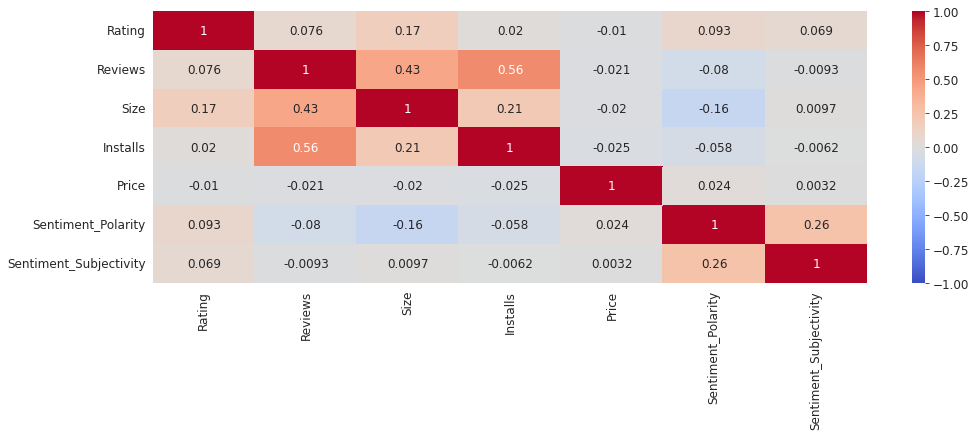

In [ ]:
# draw it on graph
plt.figure(figsize=(16,5))
sns.heatmap(merge_df_copy.corr(), vmin=-1, cmap='coolwarm', annot=True)

###**Insights**
After Analysing Above HeatMaps, we can infer that there is no good correlations between the different columns of both the data sets.

## **6.Correlation map.**

In [ ]:
#correlation 
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055081,0.061928,0.040143,-0.021199
Reviews,0.055081,1.000000,0.179429,0.625165,-0.007598
Size,0.061928,0.179429,1.000000,0.134076,-0.021729
Installs,0.040143,0.625165,0.134076,1.000000,-0.009405
Price,-0.021199,-0.007598,-0.021729,-0.009405,1.000000


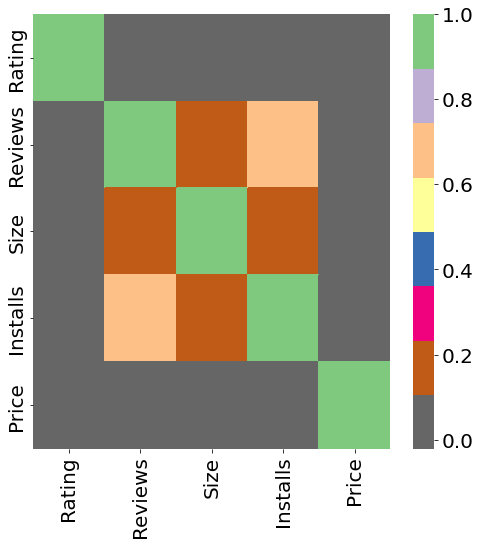

In [ ]:
#correlation map
plt.figure(figsize=(8,8))
corr= df.corr()
sns.heatmap(corr,cmap='Accent_r')
plt.show()

## **7. Compare Free and paid apps distribution on play store.**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


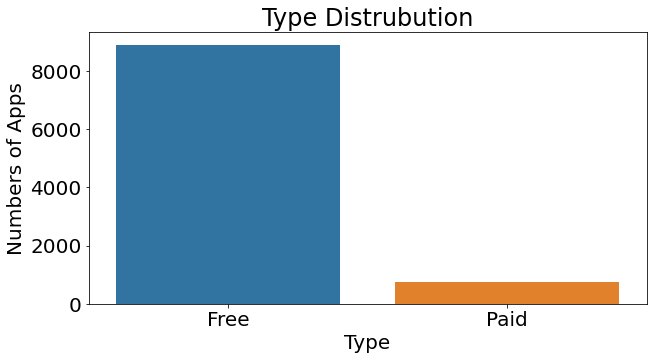

In [ ]:
# 2.Show the majority of App
plt.figure(figsize=(10,5))
sns.countplot(df['Type'])
plt.title('Type Distrubution')
plt.ylabel('Numbers of Apps')
plt.show()

### **Insights**

Around majority app are freely available on play store.

#**8.Show the distribution of apps in term of their rating, size and type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


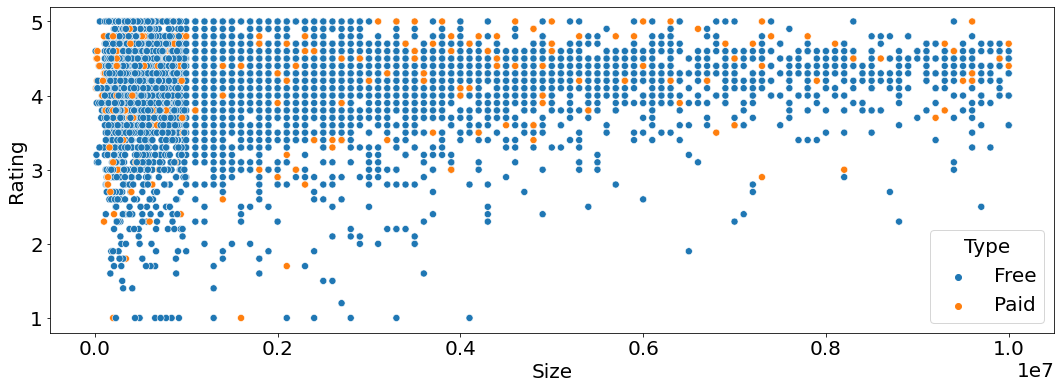

In [ ]:
# 3.show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(18, 6))
sns.scatterplot(df['Size'],
               df['Rating'],
               hue=df['Type'],
               s=50)

###**Insights**
From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

## **9. Which Category have maximum app count ?**

---



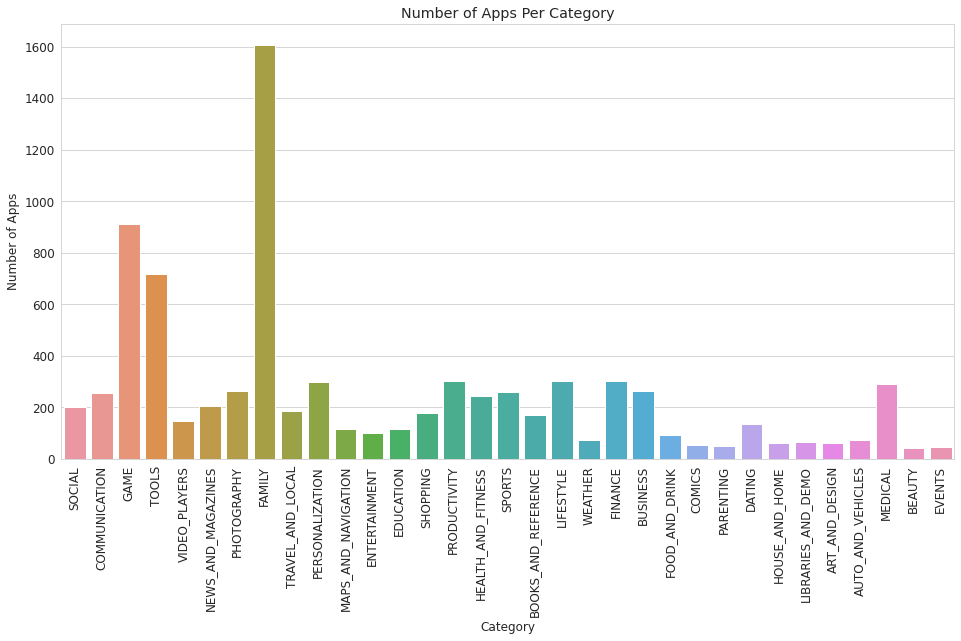

In [ ]:
# 4.get the number of apps for each category
sns.set_style('whitegrid')
plt.figure(figsize=(16, 8))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

### **Insights**
Maximum number of apps present in 'FAMILY' category then 'GAME' category and then 'TOOLS'

# **10.What is the top 5 expensive apps?**

In [ ]:
 #  What is the top 5 expensive apps?
df = df.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,730000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,270000.0,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,2600000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,270000.0,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4197,most expensive app (H),FAMILY,4.3,6,150000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up


In [ ]:
print(f'The top 5 most expensive apps in the store are: {", ".join(df["App"].head(5))}')

The top 5 most expensive apps in the store are: I'm Rich - Trump Edition, I am rich (Most expensive app), 💎 I'm rich, I Am Rich Pro, most expensive app (H)


# **11. What is the top 5 reviewed apps?**


In [ ]:
#  What is the top 5 reviewed apps?
df = df.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
3432,Facebook,SOCIAL,4.1,78158306
7665,WhatsApp Messenger,COMMUNICATION,4.4,69119316
4422,Instagram,SOCIAL,4.5,66577313
5096,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847
2073,Clash of Clans,GAME,4.6,44891723


In [ ]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans


#**12. Reviews corelation**

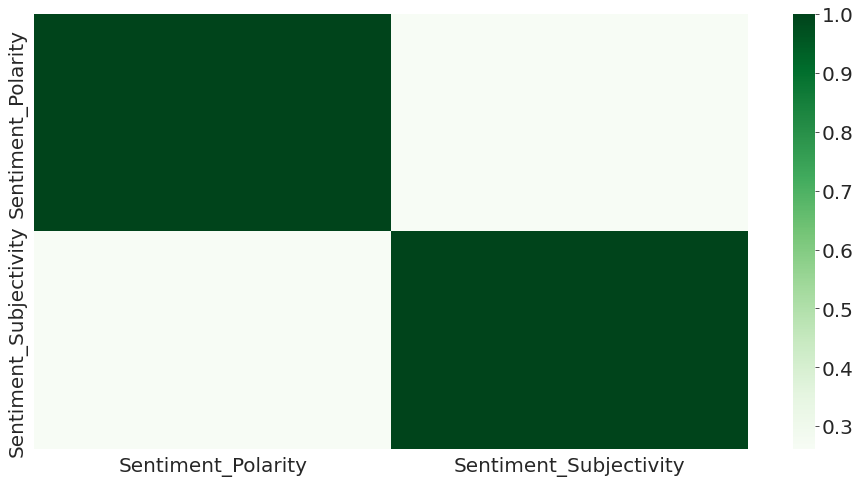

In [ ]:
df_reviews.corr()
plt.figure(figsize=(16,8))
corr= df_reviews.corr()
sns.heatmap(corr,cmap='Greens')
plt.show()

#**13.Graphical view of top 10 genres of app**

In [ ]:
df_copy['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
x=df_copy['Genres'].value_counts().reset_index()[:10]
x.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)
y=df_copy['Genres'].value_counts().reset_index()[:10]
y.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)

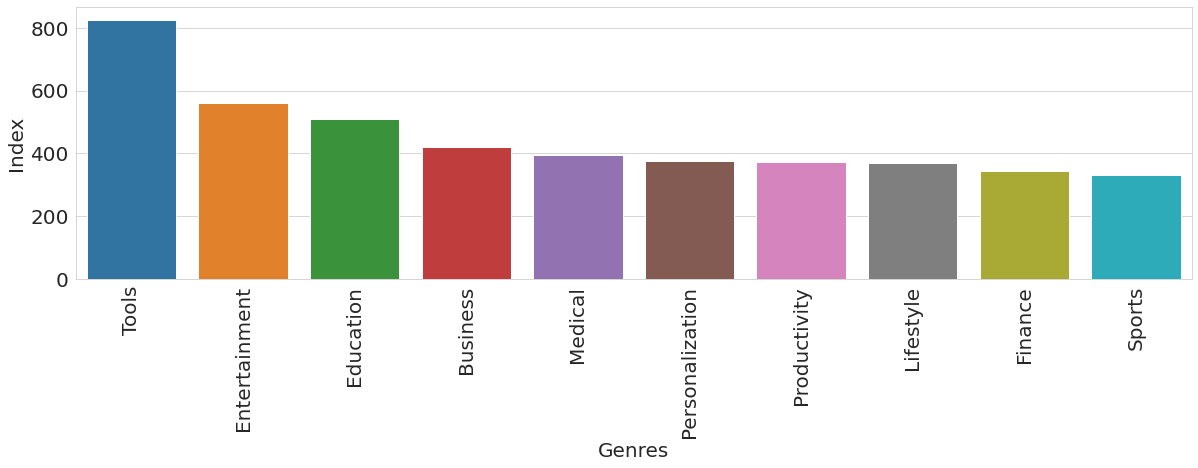

In [ ]:
plt.figure(figsize=(20,5))
fig=sns.barplot(x=x['Genres'],y=y['Index']);
plt.xticks(rotation=90);

###**Insights**
Top three Generes are Tools, Entertainment & Education .

#**14.Distribution of rating**

In [ ]:
df['Rating'].unique()

array([4.1, 4.4, 4.5, 4. , 4.6, 4.7, 4.3, 4.2, 3.8, 4.8, 3.7, 3.9, 4.9,
       3.3, 3.6, 3.5, 3.4, 2.8, 3.2, 3.1, 3. , 2.9, 2.4, 2.7, 2.5, 1.8,
       2.1, 2. , 1.7, 1.9, 2.2, 2.3, 2.6, 1.6, 5. , 1.5, 1.4, 1.2, 1. ])

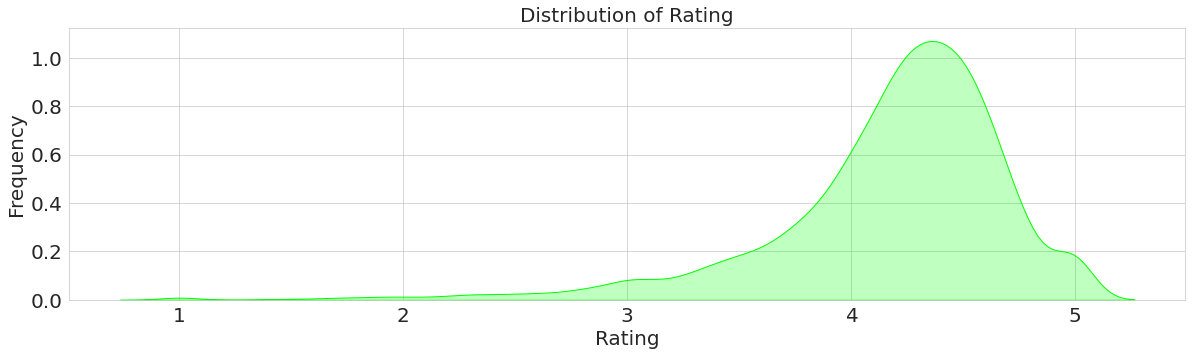

In [ ]:
##Distribution of rating of apps 
plt.figure(figsize=(20,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="lime", shade = True)
plt.title('Distribution of Rating',size = 20);

### **Insights**
From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

## **15. How is user sentiment on play store ?**

Focus on user reviews data and find out percentage wise.

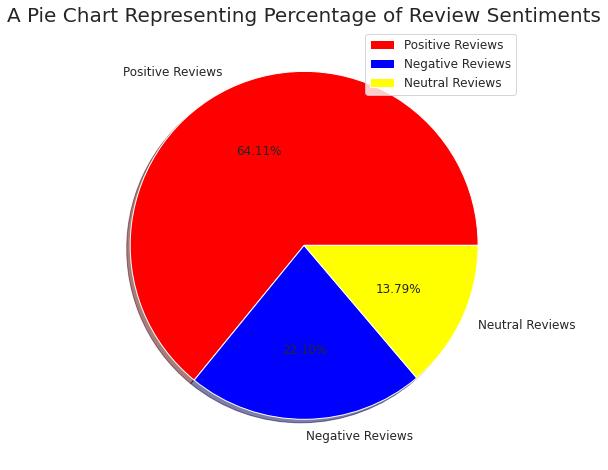

In [ ]:
#Type of reviews 
counts = list(df_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
colors = ['red','b','yellow']
plt.pie(counts, labels=labels,colors=colors, shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

### **Insights**

Positive Sentiment have larger percentage, it has 3 times more than negative sentiment.

# **Summary**

**Aniket-**When I start work on this project play store data was more valuable than user review file. So I spent maximum time on play store dataset. While working on this dataset I went through all column and take column which have maximum wightage. I discard last four columns hence, to make meaningful conclusions, I restricted to only those columns which have maximum impact. Data cleaning took maximum time compare to  finding actual insights. As it has lots of null value in all columns it is very difficult to come with accurate data. I went columnwise to remove unwanted data. Data type modify is important as without that we can not proceed to do some numeric calculation. when I went through catagorywise data it has more feasible than directly go with appwise data. App type and price does not affect on rating and reviews given by user. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps. Sentiment can be taken from user reviews dataset  for colncusion of users perspective of perticular app.

**Prajakta-** 
First of all I saw the data of play store data anylysis review project first in it I saw two csv files one which is app_csv file contains all the details of the apps on Google Play. And second file is ser_reviews.csv: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity. Later I studied the app csv file and I saw too many columns like app,category,content rating etc.I have found so many contains a large number of null values in the rating column, so we drop them. Some of the columns have a smaller number of null values, so we replace the null values in these columns with the mode value of that particular column. Our data set also contain the duplicate rows for a single application. We also drop the duplicate rows because the rows contain the identical data. After the cleaning data i turned to Exploratory Data Analysis . I found that majority of the apps in the Play Store are Free apps also top five reviewd apps,top five expensive app. I studied which app mostly installed .Which app are free or paid.I found that majority of the free apps are small in size and having high rating.

**Mahesh-**We are having a team of 3 members , today on 21th-Sep we discussed all topics which were provided for capstone project and We all came to the conclusion that we will go with Play Store App Review Analysis.
We were given two datasets one is Play Store Data and other is User Review. before watching over data provided, let's first see what actually is Exploratory Data Analysis (EDA). I have downloaded a file and started analysis.

Data contain more than ten thousand application details .
1) App Name
2) Rating
3) Category 
4) Reviews
5) Size
6) Install numbes 
7) Type
8) Price
9) Genres 
10) Current version 
11) Android version  etc
Rating is very important factor for installtion of apps as user mostly like to watch rating before using app. so developer should also work on updating their content as per the ratings.
From all above we analyze rating and installation are related, so owners should encourage to write review of their app.
Number of installation of free app is more compare to Paid app, so developer can also consider this point for high reach. 
More installation of app in game app ,followed by communication ,productivity so if one can thinking to develope an app will go for these.
We can also see social media app is almost free, so keeping social media app free may be a great advantages over others.
App category like events and beauty have not much reach, so one can also keep this consideration.
Most of the apps are downloaded by teens, so users of other age category, must also be encouraged to install the apps.
From our above analysis we conclude that sentiments of the user keep varying, so owner need to keep updating their app regularly basis on user feedback.
Positive rating ratio is high we can conclude that peoples liking apps 
More than 92% applicatins are available free on play store & Top three Generes are Tools, Entertainment & Education .


# **Conclusion**

1. Rating is very important factor for installtion of apps as user mostly like to watch rating before using app, so developer should also work on updating their content as per the ratings.

2.  From all above we analyze rating and installation are related, so owners should encourage to write review of their app.

3. Gaming have maximum number of installed app so anyone want to become developer can join this category.

4. App category like events and beauty have not much reach, so one can also keep this consideration.

5. Most of the apps are downloaded by teens, so users of other age category, must also be encouraged to install the apps.

6. Size of app factor dont affect on free or paid type apps.
7. Positive Sentiment have larger percentage, it has 3 times more than negative sentiment.
8.  Some columns do not have good correlation so we can not take any output from that columns.







